Tokenizing, Text Filtering, dan Text Parsing

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
# =====================================
# PREPROCESSING BERITA CNBC
# =====================================

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# =====================================
# 0. Download resource NLTK
# =====================================
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# =====================================
# 1. Baca data dan ambil kolom penting
# =====================================
df = pd.read_csv("/content/Case Folding_Berita_CNBC_Tema_IKN.csv", sep=';', encoding='utf-8')
df = df[['Title_Original', 'Title_Casefolded', 'Content_Original', 'Content_Casefolded']]

print("=== Data Awal ===")
display(df.head(3))

# =====================================
# 2. Hapus pembuka khas CNBC
# =====================================
def remove_cnbc_opening(text):
    text = str(text).strip()

    # 1️⃣ Bersihkan karakter aneh
    text = re.sub(r'[\xa0Â\u202f]+', ' ', text)

    # 2️⃣ Hapus pembuka khas CNBC (termasuk typo dan variasinya)
    text = re.sub(
        r'([a-z\s]*)?,?\s*(cncb|cnbc)?\s*indonesia\s*[-–—]?\s*',
        '',
        text,
        flags=re.IGNORECASE
    )

    # Tambahan: hapus pola pembuka seperti "jakarta, indonesia - ..." juga
    text = re.sub(
        r'\b(jakarta|balikpapan|samarinda|nusantara|kalimantan\s*timur|indonesia)\s*,?\s*indonesia\s*[-–—]?\s*',
        '',
        text,
        flags=re.IGNORECASE
    )

    # 3️⃣ Hapus bagian catatan opini
    text = re.sub(
        r'catatan\s*:\s*artikel\s*ini\s*merupakan\s*opini.*?(redaksi)?cnbcindonesia\.com',
        '',
        text,
        flags=re.IGNORECASE
    )

    # 4️⃣ Hapus penanda dokumen/foto
    text = re.sub(r'\(.*?dok.*?\)', '', text, flags=re.IGNORECASE)
    text = re.sub(r'cnbc\s*indonesia\s*/\s*\w+', '', text, flags=re.IGNORECASE)

    # 5️⃣ Hapus sapaan dan ajakan khas
    text = re.sub(r'(\b|^)(hai|halo)[,!\s]*(sobat\s*cuan|sobat)\b.*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(yuk\s+simak|simak\s+selengkapnya|selengkapnya\s+saksikan|tonton\s+selengkapnya|saksikan\s+di\s+program|lihat\s+video).*', '', text, flags=re.IGNORECASE)

    # 6️⃣ Bersihkan sisa spasi/tanda baca ganda
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s*,\s*', ', ', text)
    text = re.sub(r'\s*\.\s*', '. ', text)
    text = re.sub(r'\s*-\s*', ' ', text)

    return text.strip()

df['Content_Cleaned'] = df['Content_Casefolded'].apply(remove_cnbc_opening)
print("\n=== Setelah Bersihkan Pembuka CNBC ===")
display(df[['Content_Original', 'Content_Cleaned']].head(3))

# =====================================
# 3. Tokenizing
# =====================================
def tokenize_text(text):
    return nltk.word_tokenize(str(text))

df['Tokens'] = df['Content_Cleaned'].apply(tokenize_text)
print("\n=== Setelah Tokenizing ===")
display(df[['Content_Cleaned', 'Tokens']].head(3))

# =====================================
# 4. Text Filtering (hapus angka, tanda baca, stopwords)
# =====================================
stop_words = set(stopwords.words('indonesian'))

def filter_tokens(tokens):
    clean_tokens = [w for w in tokens if w.isalpha() and w.lower() not in stop_words]
    return clean_tokens

df['Filtered_Tokens'] = df['Tokens'].apply(filter_tokens)
print("\n=== Setelah Text Filtering ===")
display(df[['Tokens', 'Filtered_Tokens']].head(3))

# =====================================
# 5. Stemming (Text Parsing)
# =====================================
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Stemmed_Tokens'] = df['Filtered_Tokens'].apply(stem_tokens)
print("\n=== Setelah Stemming ===")
display(df[['Filtered_Tokens', 'Stemmed_Tokens']].head(3))

# =====================================
# 6. Simpan hasil preprocessing
# =====================================
df.to_csv("Hasil_Preprocessing_Berita_CNBC_Tema_IKN.csv", sep=';', index=False, encoding='utf-8')

from google.colab import files
files.download("Hasil_Preprocessing_Berita_CNBC_Tema_IKN.csv")

print("\n✅ Preprocessing selesai! Semua kolom hasil sudah tampil per langkah.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== Data Awal ===


,Title_Original,Title_Casefolded,Content_Original,Content_Casefolded
0,"Absen Bagi Dividen, PTPP Fokus Perkuat Struktu...","absen bagi dividen, ptpp fokus perkuat struktu...","Jakarta, CNBC Indonesia -Emiten BUMN konstruks...","jakarta, cnbc indonesia -emiten bumn konstruks..."
1,"Satgas IKN Era Jokowi Dibubarkan, Ini Gantinya","satgas ikn era jokowi dibubarkan, ini gantinya","Jakarta, CNBC Indonesia- Satuan Tugas (Satgas)...","jakarta, cnbc indonesia- satuan tugas (satgas)..."
2,"Satgas Pembangunan IKN Tiba-Tiba Dibubarkan, T...","satgas pembangunan ikn tiba-tiba dibubarkan, t...","Jakarta, CNBC Indonesia -Kementerian Pekerjaan...","jakarta, cnbc indonesia -kementerian pekerjaan..."



=== Setelah Bersihkan Pembuka CNBC ===


,Content_Original,Content_Cleaned
0,"Jakarta, CNBC Indonesia -Emiten BUMN konstruks...","emiten bumn konstruksi dan investasi, pt pp (p..."
1,"Jakarta, CNBC Indonesia- Satuan Tugas (Satgas)...",satuan tugas (satgas) pembangunan infrastruktu...
2,"Jakarta, CNBC Indonesia -Kementerian Pekerjaan...",kementerian pekerjaan umum dan perumahan rakya...



=== Setelah Tokenizing ===


,Content_Cleaned,Tokens
0,"emiten bumn konstruksi dan investasi, pt pp (p...","[emiten, bumn, konstruksi, dan, investasi, ,, ..."
1,satuan tugas (satgas) pembangunan infrastruktu...,"[satuan, tugas, (, satgas, ), pembangunan, inf..."
2,kementerian pekerjaan umum dan perumahan rakya...,"[kementerian, pekerjaan, umum, dan, perumahan,..."



=== Setelah Text Filtering ===


,Tokens,Filtered_Tokens
0,"[emiten, bumn, konstruksi, dan, investasi, ,, ...","[emiten, bumn, konstruksi, investasi, pt, pp, ..."
1,"[satuan, tugas, (, satgas, ), pembangunan, inf...","[satuan, tugas, satgas, pembangunan, infrastru..."
2,"[kementerian, pekerjaan, umum, dan, perumahan,...","[kementerian, pekerjaan, perumahan, rakyat, pu..."



=== Setelah Stemming ===


,Filtered_Tokens,Stemmed_Tokens
0,"[emiten, bumn, konstruksi, investasi, pt, pp, ...","[emiten, bumn, konstruksi, investasi, pt, pp, ..."
1,"[satuan, tugas, satgas, pembangunan, infrastru...","[satu, tugas, satgas, bangun, infrastruktur, k..."
2,"[kementerian, pekerjaan, perumahan, rakyat, pu...","[menteri, kerja, rumah, rakyat, pupr, resmi, b..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Preprocessing selesai! Semua kolom hasil sudah tampil per langkah.


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 111.4 MB/s eta 0:00:00


Preprocessing Lanjutan (Hapus Duplikat, Normalisasi Kata Singkat, Kata Gaul, Typo, Kata Berulang, Hapus Kata Kurang dari 3)

In [ ]:
import pandas as pd
import re

# ==========================
# 1️⃣ Baca dataset sebelumnya
# ==========================
df = pd.read_csv("Hasil_Preprocessing_Berita_CNBC_Tema_IKN.csv", sep=';', encoding='utf-8')

# Gunakan stemmed tokens sebagai dasar
df['Stemmed_Text'] = df['Stemmed_Tokens'].apply(lambda x: ' '.join(eval(x) if isinstance(x, str) else x))

# ==========================
# 2️⃣ Hapus duplikat
# ==========================
df = df.drop_duplicates(subset=['Stemmed_Text'])
print(f"Jumlah data setelah hapus duplikat: {len(df)}")

# ==========================
# 3️⃣ Kamus kata gaul / typo manual
# ==========================
alay_dict = {
    'gk': 'tidak', 'ga': 'tidak', 'ngga': 'tidak', 'nggak': 'tidak', 'ngg': 'tidak',
    'bgt': 'banget', 'sm': 'sama', 'tmn': 'teman', 'tmn2': 'teman-teman',
    'aq': 'aku', 'ak': 'aku', 'gw': 'aku', 'gue': 'aku', 'sy': 'saya',
    'syg': 'sayang', 'bodo': 'bodoh', 'dpt': 'dapat', 'udh': 'sudah',
    'dgn': 'dengan', 'aja': 'saja', 'bner': 'benar', 'bgus': 'bagus',
    'mantapp': 'mantap', 'parahh': 'parah', 'bosen': 'bosan', 'cape': 'capek',
    'lo': 'kamu', 'lu': 'kamu', 'km': 'kamu', 'ok': 'oke', 'okee': 'oke',
    'makasih': 'terima kasih', 'makasi': 'terima kasih', 'thx': 'terima kasih',
    'tq': 'terima kasih', 'pls': 'tolong', 'pliss': 'tolong',
    'bsk': 'besok', 'skrg': 'sekarang', 'nnti': 'nanti', 'ntar': 'nanti',
    'btw': 'ngomong-ngomong', 'tp': 'tapi', 'tpi': 'tapi', 'krn': 'karena',
    'karna': 'karena', 'mkn': 'makan', 'mknn': 'makanan', 'bgitu': 'begitu',
    'seklah': 'sekolah', 'tdk': 'tidak', 'dr': 'dari', 'yg': 'yang'
}

def normalize_token(token):
    # Normalisasi kata gaul
    token = alay_dict.get(token, token)
    # Hapus huruf berulang >2
    token = re.sub(r'(.)\1{2,}', r'\1', token)
    # Hapus kata <3 huruf
    if len(token) < 3:
        return None
    return token

# ==========================
# 4️⃣ Terapkan normalisasi token
# ==========================
def normalize_tokens_list(tokens):
    return [t for t in (normalize_token(t) for t in tokens) if t is not None]

df['Tokens_Final'] = df['Stemmed_Tokens'].apply(lambda x: normalize_tokens_list(eval(x) if isinstance(x, str) else x))

# ==========================
# 5️⃣ Tampilkan dataframe final
# ==========================
display_cols = ['Content_Original', 'Stemmed_Tokens', 'Tokens_Final']
print("=== Contoh 5 baris setelah normalisasi final ===")
display(df[display_cols].head())

# ==========================
# 6️⃣ Simpan hasil akhir
# ==========================
df.to_csv("CNBC_Stemmed_Normalized.csv", sep=';', index=False, encoding='utf-8')
print("\n✅ Selesai! Kolom Tokens_Final sudah siap digunakan.")


Jumlah data setelah hapus duplikat: 1000
=== Contoh 5 baris setelah normalisasi final ===


,Content_Original,Stemmed_Tokens,Tokens_Final
0,"Jakarta, CNBC Indonesia -Emiten BUMN konstruksi dan investasi, PT PP (Persero) Tbk (PTPP) memutu...","['emiten', 'bumn', 'konstruksi', 'investasi', 'pt', 'pp', 'persero', 'tbk', 'ptpp', 'putus', 'ba...","[emiten, bumn, konstruksi, investasi, persero, tbk, ptpp, putus, bagi, dividen, direktur, utama,..."
1,"Jakarta, CNBC Indonesia- Satuan Tugas (Satgas) Pembangunan Infrastruktur Ibu Kota Negara (IKN) N...","['satu', 'tugas', 'satgas', 'bangun', 'infrastruktur', 'kota', 'negara', 'ikn', 'nusantara', 'be...","[satu, tugas, satgas, bangun, infrastruktur, kota, negara, ikn, nusantara, bentuk, era, perintah..."
2,"Jakarta, CNBC Indonesia -Kementerian Pekerjaan Umum dan Perumahan Rakyat (PUPR) resmi membubarka...","['menteri', 'kerja', 'rumah', 'rakyat', 'pupr', 'resmi', 'bubar', 'satu', 'tugas', 'satgas', 'ba...","[menteri, kerja, rumah, rakyat, pupr, resmi, bubar, satu, tugas, satgas, bangun, infrastruktur, ..."
3,"Jakarta, CNBC Indonesia- Menteri Pekerjaan Umum (PU) Dody Hanggodo membubarkan Satuan Tugas (Sat...","['menteri', 'kerja', 'pu', 'dody', 'hanggodo', 'bubar', 'satu', 'tugas', 'satgas', 'bangun', 'in...","[menteri, kerja, dody, hanggodo, bubar, satu, tugas, satgas, bangun, infrastruktur, kota, negara..."
4,"Jakarta, CNBC Indonesia -Pemerintah telah memutuskan untuk menunda pemindahan aparatur sipil neg...","['perintah', 'putus', 'tunda', 'pindah', 'aparatur', 'sipil', 'negara', 'asn', 'picu', 'dinamika...","[perintah, putus, tunda, pindah, aparatur, sipil, negara, asn, picu, dinamika, perintah, bentuk,..."



✅ Selesai! Kolom Tokens_Final sudah siap digunakan.


N-Gram 1-3

Kolom tersedia: ['Title_Original', 'Title_Casefolded', 'Content_Original', 'Content_Casefolded', 'Content_Cleaned', 'Tokens', 'Filtered_Tokens', 'Stemmed_Tokens', 'Stemmed_Text', 'Tokens_Final']
=== Top 20 N-Gram (1–3) Paling Sering ===


,ngram,freq
0,ikn,4214
1,bangun,2589
2,menteri,2108
3,presiden,2031
4,kota,1946
5,indonesia,1753
6,nusantara,1627
7,jokowi,1623
8,perintah,1445
9,negara,1403


/tmp/ipython-input-172923024.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='ngram', data=top20, palette='magma')


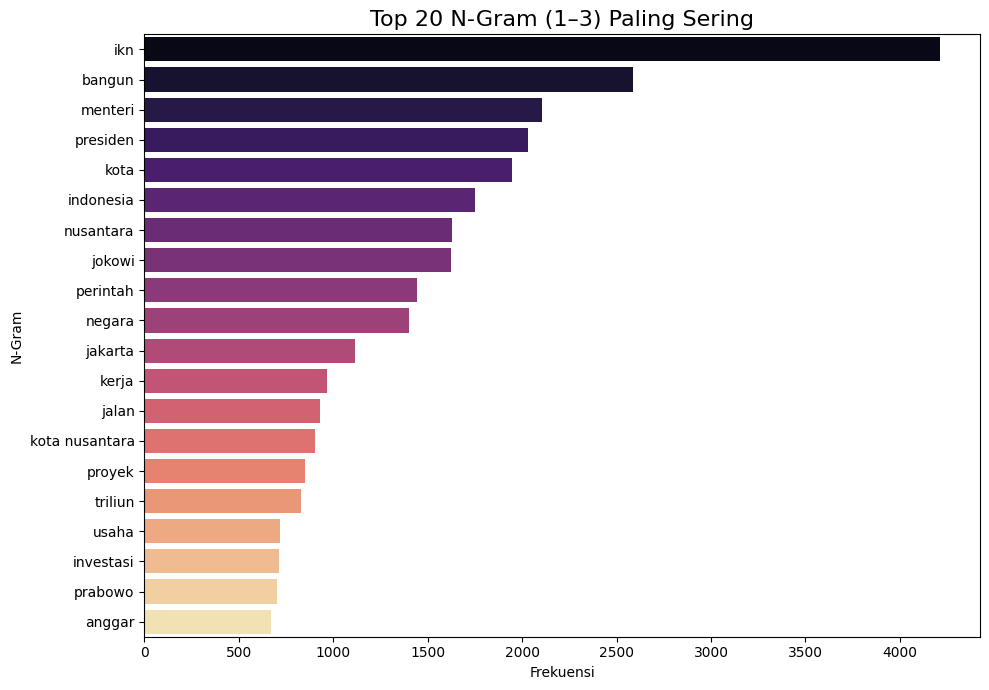

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# 1️⃣ Baca file hasil penghapusan nama
df = pd.read_csv('/content/CNBC_Stemmed_Normalized.csv', on_bad_lines='skip', sep=None, engine='python')

# 2️⃣ Pastikan kolom ada
print("Kolom tersedia:", df.columns.tolist())

# 3️⃣ Gabungkan token menjadi satu string
df['Text_Final'] = df['Tokens_Final'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

# 4️⃣ Gunakan CountVectorizer untuk n-gram 1–3
vectorizer = CountVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(df['Text_Final'])

# 5️⃣ Hitung frekuensi tiap n-gram
ngram_counts = np.array(X.sum(axis=0)).flatten()
ngram_features = vectorizer.get_feature_names_out()

# 6️⃣ Buat DataFrame frekuensi n-gram
freq_df = pd.DataFrame({'ngram': ngram_features, 'freq': ngram_counts})

# 7️⃣ Ambil 20 n-gram paling sering
top20 = freq_df.sort_values(by='freq', ascending=False).head(20).reset_index(drop=True)

print("=== Top 20 N-Gram (1–3) Paling Sering ===")
display(top20)

# 8️⃣ Visualisasi
plt.figure(figsize=(10,7))
sns.barplot(x='freq', y='ngram', data=top20, palette='magma')
plt.title('Top 20 N-Gram (1–3) Paling Sering', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('N-Gram')
plt.tight_layout()
plt.show()


N-Gram 1-3 Setelah Pembersihan Kata Tidak Ada Makna

,Tokens_Final,tokens_sentimen
0,"['emiten', 'bumn', 'konstruksi', 'investasi', ...","[emiten, dividen, novel, arsyad, pegang, rupst..."
1,"['satu', 'tugas', 'satgas', 'bangun', 'infrast...","[bubar, bubar, terbit, cabut, kepmen, maret, t..."
2,"['menteri', 'kerja', 'rumah', 'rakyat', 'pupr'...","[bubar, bubar, terbit, tuang, kepmen, cabut, k..."
3,"['menteri', 'kerja', 'dody', 'hanggodo', 'buba...","[bubar, terbit, cabut, kepmen, maret, timbang,..."
4,"['perintah', 'putus', 'tunda', 'pindah', 'apar...","[tunda, picu, dinamika, sesuai, pendayagunaan,..."


/tmp/ipython-input-2972996618.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='word', data=freq_uni.head(20), palette='viridis')


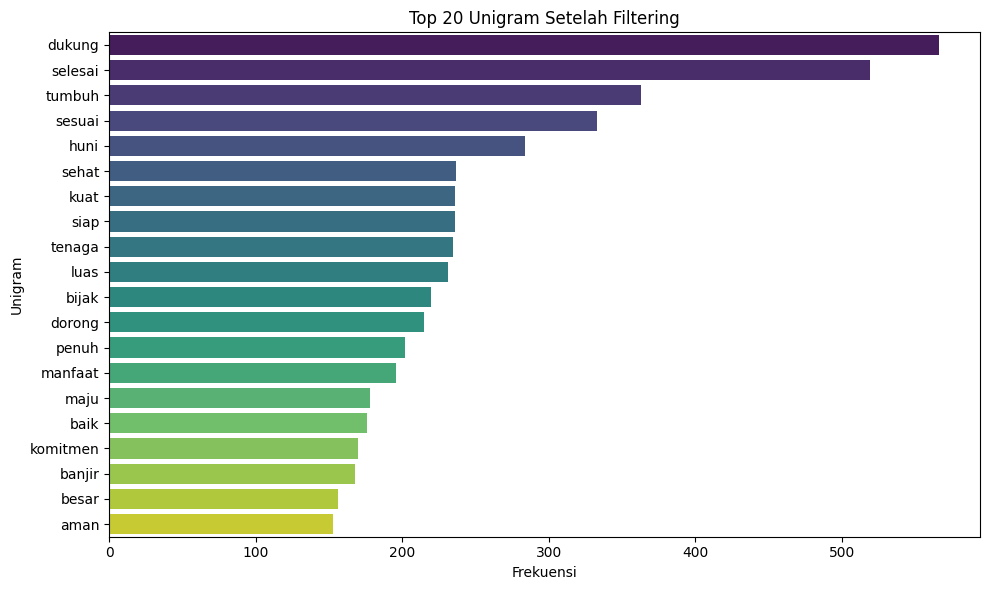

/tmp/ipython-input-2972996618.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='word', data=freq_bi.head(20), palette='magma')


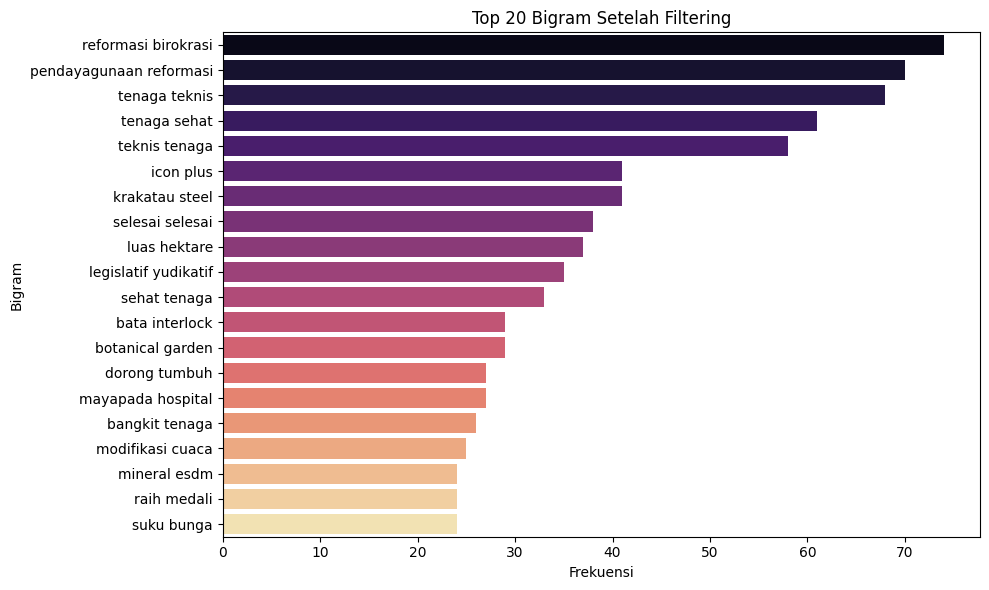

/tmp/ipython-input-2972996618.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='word', data=freq_tri.head(20), palette='crest')


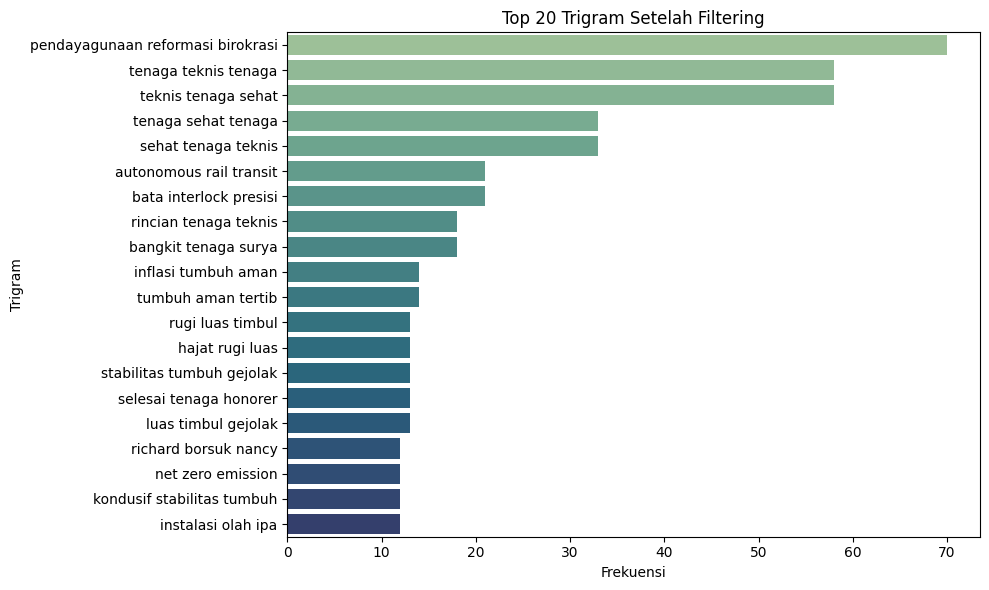

<Figure size 640x480 with 0 Axes>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# 1️⃣ Baca file hasil penghapusan nama
df = pd.read_csv('/content/CNBC_Stemmed_Normalized.csv', on_bad_lines='skip', sep=None, engine='python')

# 2️⃣ Daftar kata netral (stoplist terbaru)
stop_sentimen_words = [
    'ikn','presiden','kota','menteri','indonesia','nusantara','jokowi','perintah','negara',
    'jakarta','kerja','jalan','istana','rumah','upacara','kalimantan','kantor','widodo','joko',
    'kepala','air','asn','ekonomi','prabowo','basuki','orang','triliun','usaha','investasi',
    'anggar','pindah','infrastruktur','milik','tingkat','rencana','kawasan','agustus','timur',
    'pusat','kembang','wakil','uang','nilai','resmi','laksana','daerah','merdeka','nasional',
    'formasi','hotel','masuk','hasil','badan','program','investor','jabat','otorita','kutip',
    'oikn','miliar','layan','capai','butuh','buka','lanjut','masyarakat',
    'kait','pilih','salah','cepat','teknologi','bandara','karya','utama','wilayah',
    'energi','tahap','target','juli','industri','hadir','tanah','sedia','harap','cpns',
    'fasilitas','pupr','sektor','pimpin','bidang','total','subianto','negeri','putus','senin',
    'hut','terima','juta','dasar','terang','tol','tambah','sistem','kabinet','proses','gedung',
    'atur','bisnis','catat','khusus','tower','temu','tugas','selasa','rabu','langsung','operasi',
    'persero','dpr','laku','bahlil','direktur','sumber','belanja','rakyat','group','konstruksi',
    'tbk','bentuk','didik','dapat','lembaga','pegawai','apbn','ketua','lokasi','rapat','lingkung',
    'tuju','digital','meter','jaring','oktober','sebut','aparatur','jaga','jawa','daftar','ubah',
    'harga','kelola','cnbc','satu','akses','dampak','bumn','arah','kualitas','tinggal','potensi',
    'fokus','tanggal','modal','asing','sipil','unit','hubung','acara','kali','transportasi','budi',
    'bambang','jumat','sempat','hadimuljono','lapang','bank','makan','hijau','sekolah','pln','wika',
    'anas','periode','data','nomor','uji','tulis','informasi','kondisi','kipp','garuda','sidang',
    'dunia','china','pulau','provinsi','bangsa','kamis','turut','otonom','pasar','sri','partai',
    'ingat','laut','september','gelar','ruang','bbm','selenggara','posisi','internasional','utara',
    'barat','biaya','kurang','inti','mulyani','sri mulyani','subsidi','balikpapan','minum','batas',
    'alas','nama','coba','saham','art','lahan','alami','tata','produk','pakai','prioritas','kendara',
    'undang','area','lengkap','desa','tahan','tempat','banding','sisi','nila','koordinator','tunggu',
    'astra','plt','gas','ribu','aku','lapor','guna','global','tanam','beli','kamar','serta',
    'anggota','publik','media','swasta','republik','panrb','dagang','sekretariat','komisi','bas',
    'tidak','jenderal','pertamina','dana','minggu','keluarga','komunikasi','tamu','insentif','kaya',
    'baru','ambil','casn','tni','properti','isi','konsep','syarat','kereta','gubernur','waskita',
    'ekosistem','hukum','bahan','alam','satgas','hutan','selatan','ada','rancang','hujan','city',
    'sarana','politik','kamu','sulawesi','pers','mudah','sakit','bahas','najam','nyata','raya',
    'tunjang','center','merah','pangan','produksi','bantu','usul','trem','sebab','kompleks','sosial',
    'bendera','bawa','konsorsium','umum','calon','putih','groundbreaking','koordinasi','kontrak',
    'juni','airlangga','alokasi','kabupaten','pesawat','bangun','bangun bangun','listrik','seleksi',
    'ganti','proyek','tetap','kapasitas','progres','papua','dhony','sabtu','mobil','agung','poc',
    'telkomsel','muka','jangka','sekretaris','kemenko','and','aguan','tim','jam','asia','liput',
    'wartawan','kunjung','office','impor','turun','luhut','daya','giat','amerika','serikat','beliau',
    'dody','hanggodo','gibran','rakabuming','raka','erick','thohir','ridwan','kamil','agus','harimurti',
    'lihat','paku','deputi','raja','kesiap','jembatan','tahun','terap','udara','dki','jenis','darat','agama',
    'sugianto','kusuma','abudallah','azwar','insya','allah','bkpm','lahadalia','minta','susantono','rahajoe',
    'gizi','gratis','tangkap','layar','teks','proklamasi','baju','adat','leta','morgan','stanley','email','protected',
    'uni','emirat','arab','yusuf','permana','suharso','monoarfa','bappenas','abdullah','rini','widyantini','sultan','aji',
    'muhammad','prestasi','kumulatif','ipk','barito','pasific','mulia','ikut','paskibraka','lamar','malam','hak',
    'bagi','lagi','jadi','lulus','duduk','depan','sig','pns','beri','tutup','peran','hadap','titik','sorot','bumi','paser','tengah','cipta','wujud','angka','polri','cari',
    'kemarin','jual','papar','libat','urus','lantai','anak','bicara','lantik','izin','tarik','kena','status','tani','instansi','guru','emas','kelas','surat','persegi','aktivitas','pagu','jelang','mitra',
    'desember','diri','segmen','ulang','grup','situasi','salim','pasok','tanda','bal','tekan','mitra','cari','iring','ros','januari','era','pungkas','telkom','tiga','tawar',
    'batu','dewan','janji','kasih','ahy','plts','bayar','susun','level','beda','asal','pasti','perhati','bakar','tanggung','tangan','oleh','bina','hilir','adhi',
    'imbuh','gerak','jasa','semen','hormat','muat','ptpp','wib','family','pasal','dokumen'
]
stop_sentimen_words = [w.lower() for w in stop_sentimen_words]

# 3️⃣ Hapus kata netral dari token
def hapus_kata_netral(tokens):
    if isinstance(tokens, str):
        tokens = eval(tokens)
    return [w for w in tokens if w.lower() not in stop_sentimen_words]

df['tokens_sentimen'] = df['Tokens_Final'].apply(hapus_kata_netral)

# 4️⃣ Tampilkan contoh hasil
display(df[['Tokens_Final', 'tokens_sentimen']].head())

# 5️⃣ Analisis frekuensi kata
df['text_sentimen'] = df['tokens_sentimen'].apply(lambda x: ' '.join(x))

# --- Unigram ---
vectorizer_uni = CountVectorizer(ngram_range=(1,1))
X_uni = vectorizer_uni.fit_transform(df['text_sentimen'])
freq_uni = pd.DataFrame({
    'word': vectorizer_uni.get_feature_names_out(),
    'freq': np.array(X_uni.sum(axis=0)).flatten()
}).sort_values(by='freq', ascending=False).reset_index(drop=True)

# --- Bigram ---
vectorizer_bi = CountVectorizer(ngram_range=(2,2))
X_bi = vectorizer_bi.fit_transform(df['text_sentimen'])
freq_bi = pd.DataFrame({
    'word': vectorizer_bi.get_feature_names_out(),
    'freq': np.array(X_bi.sum(axis=0)).flatten()
}).sort_values(by='freq', ascending=False).reset_index(drop=True)

# --- Trigram ---
vectorizer_tri = CountVectorizer(ngram_range=(3,3))
X_tri = vectorizer_tri.fit_transform(df['text_sentimen'])
freq_tri = pd.DataFrame({
    'word': vectorizer_tri.get_feature_names_out(),
    'freq': np.array(X_tri.sum(axis=0)).flatten()
}).sort_values(by='freq', ascending=False).reset_index(drop=True)

# 6️⃣ Visualisasi bertahap
plt.figure(figsize=(10,6))
sns.barplot(x='freq', y='word', data=freq_uni.head(20), palette='viridis')
plt.title('Top 20 Unigram Setelah Filtering')
plt.xlabel('Frekuensi')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='freq', y='word', data=freq_bi.head(20), palette='magma')
plt.title('Top 20 Bigram Setelah Filtering')
plt.xlabel('Frekuensi')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='freq', y='word', data=freq_tri.head(20), palette='crest')
plt.title('Top 20 Trigram Setelah Filtering')
plt.xlabel('Frekuensi')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


WordCloud 20 Kata

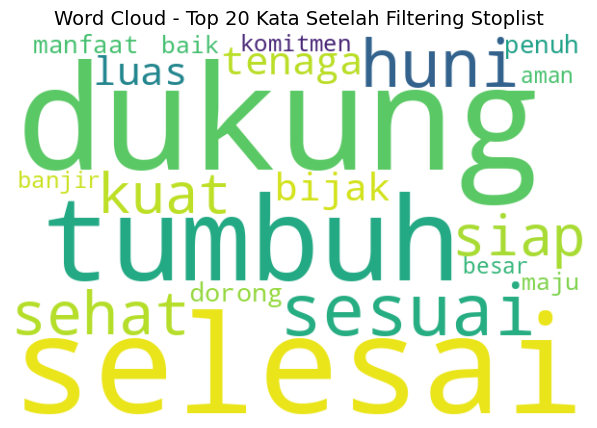

In [36]:
# =====================================
# WordCloud - Top 20 Kata Paling Dominan
# =====================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Gabungkan token jadi string
all_content = [' '.join(token) for token in df['tokens_sentimen']]

# Hitung frekuensi kata
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_content)
word_counts = np.array(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'freq': word_counts})
top20 = freq_df.sort_values(by='freq', ascending=False).head(20)

# Buat dictionary {kata: frekuensi}
word_freq = dict(zip(top20['word'], top20['freq']))

# Buat WordCloud (hanya 20 kata)
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=20,
    prefer_horizontal=1.0
).generate_from_frequencies(word_freq)

# Plot hasil
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Top 20 Kata Setelah Filtering Stoplist', fontsize=14)
plt.axis('off')
plt.show()


WordCloud

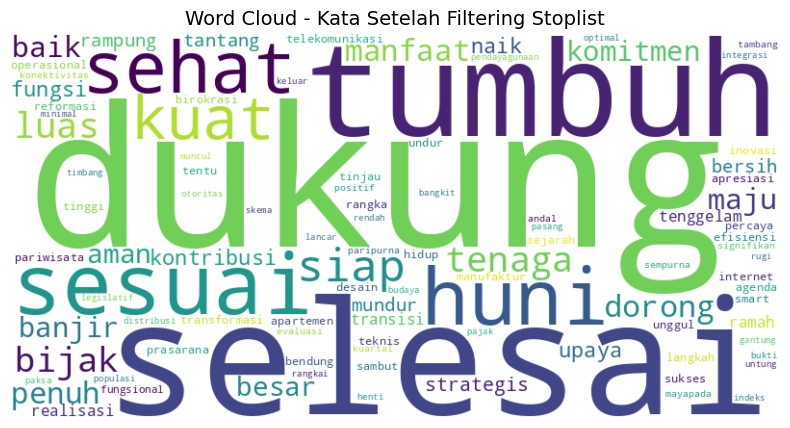

In [63]:
# =====================================
# ✅ WordCloud - Pakai hasil freq_uni
# =====================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil top 100 dari unigram yang sudah bersih
top100 = freq_uni.head(100)

# Buat dictionary {kata: frekuensi}
word_freq = dict(zip(top100['word'], top100['freq']))

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    prefer_horizontal=1.0
).generate_from_frequencies(word_freq)

# Plot hasil
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Kata Setelah Filtering Stoplist', fontsize=14)
plt.axis('off')
plt.show()


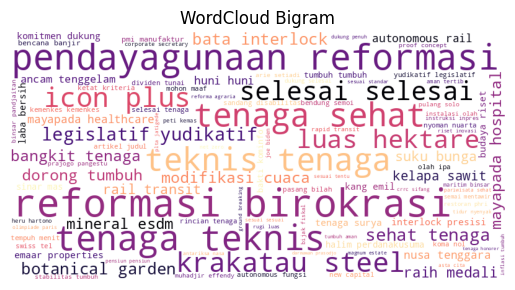

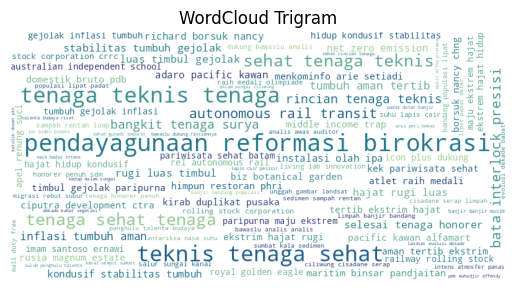

In [64]:
# Untuk Bigram
top100_bi = freq_bi.head(100)
word_freq_bi = dict(zip(top100_bi['word'], top100_bi['freq']))
wordcloud_bi = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate_from_frequencies(word_freq_bi)
plt.imshow(wordcloud_bi); plt.axis('off'); plt.title('WordCloud Bigram'); plt.show()

# Untuk Trigram
top100_tri = freq_tri.head(100)
word_freq_tri = dict(zip(top100_tri['word'], top100_tri['freq']))
wordcloud_tri = WordCloud(width=800, height=400, background_color='white', colormap='crest').generate_from_frequencies(word_freq_tri)
plt.imshow(wordcloud_tri); plt.axis('off'); plt.title('WordCloud Trigram'); plt.show()
